# Plot Training Logs : MarioBros-PPO 🍄🕹️

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import json

##### Listing the available files

**Note** : Some of them will be labeled "continuous", they use the continuous model.

In [3]:
files = glob.glob('../models/PPO_MarioBros*_log.csv')
for no, file in enumerate(files):
    fname = file.replace('_', ' ')
    print(f"{no:2d} | {fname}")

 0 | ../models\PPO MarioBros 24-08-14 17-00 log.csv
 1 | ../models\PPO MarioBros 24-08-14 17-06 log.csv
 2 | ../models\PPO MarioBros 24-08-14 17-08 log.csv


In [4]:
choice = -1 # Make your choice here

##### Printing the hyperparameters

In [5]:
continuous = False
print('Hyperparameters \n' + '-'*40)
with open(files[choice].replace('log.csv','prms.json')) as jfile:
    prms = json.load(jfile)
    for key, val in prms.items():
        print(f'{key:>30s} : {val}')

if 'continuous' in files[choice].lower():
    continuous = True

print(f'{"CONTINUOUS":>30s} : {continuous}')

Hyperparameters 
----------------------------------------
                     MAX_STEPS : 5000000
                        N_IMGS : 3
                        N_IDLE : 3
                  N_START_SKIP : 3
                         GAMMA : 0.95
                     N_FILTERS : 24
                  DROPOUT_RATE : 0
                      ACTOR_LR : 0.001
                     CRITIC_LR : 0.001
                      L2_ALPHA : 0
            SCHEDULER_PATIENCE : 200
              SCHEDULER_MIN_LR : 3e-05
              SCHEDULER_FACTOR : 0.5
               STEPS_TO_UPDATE : 2000
                 UPDATE_EPOCHS : 5
                  ENTROPY_BETA : 0.001
                  PPO_CLIP_VAL : 0.2
                MINIBATCH_SIZE : 64
                    CONTINUOUS : False


##### Plotting the data

In [6]:
df = pd.read_csv(files[choice])

In [7]:
df

,episode,step,time,cum_reward,a_loss,c_loss,epsilon,action_0,action_1,action_2,action_3,action_4,actor_lr,critic_lr
0,0,2090,6.012980,271.0,0.000000,0.000000,0.000000,0.087518,0.088953,0.088953,0.071736,0.111908,0.001000,0.001
1,1,828,8.649955,20.0,0.000000,0.000000,0.000000,0.068841,0.050725,0.072464,0.097826,0.115942,0.001000,0.001
2,2,506,10.136993,209.0,0.000000,0.000000,0.000000,0.082840,0.053254,0.088757,0.136095,0.088757,0.001000,0.001
3,3,6020,47.245126,334.0,-0.018611,631.994588,0.002471,0.095167,0.079721,0.093672,0.097160,0.091181,0.001000,0.001
4,4,435,48.806964,225.0,-0.018611,631.994588,0.002471,0.075862,0.075862,0.131034,0.068966,0.082759,0.001000,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12052,12052,288,32285.321531,634.0,-0.021768,405.266535,0.000428,0.145833,0.041667,0.020833,0.104167,0.583333,0.000125,0.001
12053,12053,258,32286.230110,677.0,-0.021768,405.266535,0.000428,0.023256,0.023256,0.011628,0.290698,0.616279,0.000125,0.001
12054,12054,605,32288.228295,929.0,-0.021768,405.266535,0.000428,0.069307,0.039604,0.084158,0.178218,0.534653,0.000125,0.001
12055,12055,464,32289.734283,1276.0,-0.021768,405.266535,0.000428,0.070968,0.032258,0.006452,0.212903,0.612903,0.000125,0.001


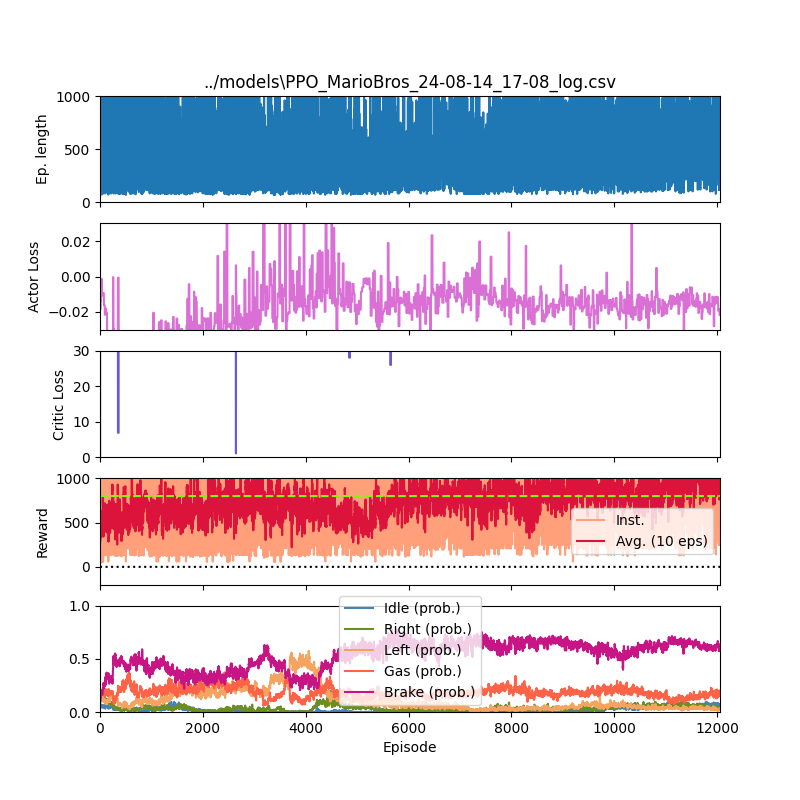

In [8]:
%matplotlib widget

fig, axes = plt.subplots(nrows=5, sharex=True, figsize=[8,8])

axes[0].plot(df['episode'], df['step'])
axes[1].plot(df['episode'], df['a_loss'], color='orchid')
axes[2].plot(df['episode'], df['c_loss'], color='slateblue')
axes[3].plot(df['episode'], df['cum_reward'], color='lightsalmon', label='Inst.')
axes[3].plot(df['episode'], df['cum_reward'].rolling(10, center=True).mean(), color='crimson', label='Avg. (10 eps)')

if continuous: 
    axes[4].plot(df['episode'], df['action_0'].rolling(10, center=True).mean(), color='steelblue', label='Left/Right (avg)')
    axes[4].plot(df['episode'], df['action_1'].rolling(10, center=True).mean(), color='lawngreen', label='Gas (avg)')
    axes[4].plot(df['episode'], df['action_2'].rolling(10, center=True).mean(), color='tomato', label='Brake (avg)')
    axes[4].set_ylim([-2,2])
else:
    axes[4].plot(df['episode'], df['action_0'].rolling(10, center=True).mean(), color='steelblue', label='Idle (prob.)')
    axes[4].plot(df['episode'], df['action_1'].rolling(10, center=True).mean(), color='olivedrab', label='Right (prob.)')
    axes[4].plot(df['episode'], df['action_2'].rolling(10, center=True).mean(), color='sandybrown', label='Left (prob.)')
    axes[4].plot(df['episode'], df['action_3'].rolling(10, center=True).mean(), color='tomato', label='Gas (prob.)')
    axes[4].plot(df['episode'], df['action_4'].rolling(10, center=True).mean(), color='mediumvioletred', label='Brake (prob.)')
    axes[4].set_ylim([0,1])

# Formatting
axes[3].plot(df['episode'], np.zeros_like(df['cum_reward']), 'k:')
axes[3].plot(df['episode'], 800 * np.ones_like(df['cum_reward']), '--', color='lawngreen')
axes[0].set_ylabel('Ep. length')
axes[1].set_ylabel('Actor Loss')
axes[2].set_ylabel('Critic Loss')
axes[3].set_ylabel('Reward')
axes[3].legend()
axes[4].legend()

axes[0].set_ylim([0, 1000])
axes[1].set_ylim([-0.03,0.03])
axes[2].set_ylim([0,30])
axes[3].set_ylim([-200,1000])

axes[0].set_title(files[choice])
axes[4].set_xlim([0, df['episode'].max()])
axes[4].set_xlabel('Episode')


fig.savefig(files[choice].replace('log.csv','fig.png'))